In [92]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [93]:
df = pd.read_csv(r'c:\Users\Admin\Documents\DataSets\DigitRecognizer\train.csv',encoding='Latin')

In [60]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df.shape

(42000, 785)

In [14]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34602,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


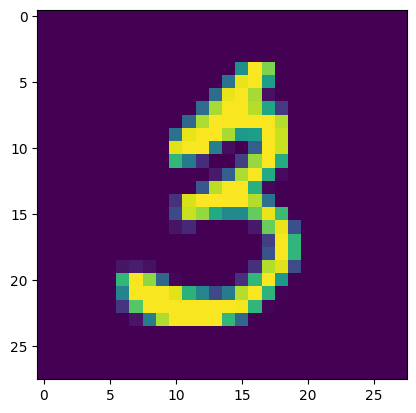

In [15]:
plt.imshow(df.iloc[34602,1:].values.reshape(28,28))

In [94]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [65]:
X_train.shape

(33600, 784)

In [125]:
Y_train.shape

(33600,)

In [27]:
X_test.shape

(8400, 784)

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
model=KNeighborsClassifier()
model.fit(X_train,Y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [30]:
import time
start = time.time()
y_pred = model.predict(X_test)
print(time.time()-start)

27.935449838638306


In [31]:
y_pred

array([8, 1, 9, ..., 3, 0, 9])

In [98]:
from sklearn.metrics import accuracy_score

In [37]:
Accuracy = accuracy_score(Y_test , y_pred)
Accuracy

0.9648809523809524

PCA

In [99]:
# Mean center the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [100]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [156]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=450)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [157]:
X_train_trf.shape

(33600, 450)

In [158]:
X_test_trf.shape

(8400, 450)

In [159]:
model = KNeighborsClassifier()
model.fit(X_train_trf , Y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [160]:
y_pred = model.predict(X_test_trf)

In [161]:
accuracy_score(Y_test,y_pred)

0.9422619047619047

In [68]:
for i in range(1,100):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    model = KNeighborsClassifier()
    model.fit(X_train_trf , Y_train)
    y_pred = model.predict(X_test_trf)
    print(f"Accuracy when i = {i} ",accuracy_score(Y_test,y_pred))
    

Accuracy when i = 1  0.2580952380952381
Accuracy when i = 2  0.3236904761904762
Accuracy when i = 3  0.5104761904761905
Accuracy when i = 4  0.6663095238095238
Accuracy when i = 5  0.7378571428571429
Accuracy when i = 6  0.8227380952380953
Accuracy when i = 7  0.8436904761904762
Accuracy when i = 8  0.8721428571428571
Accuracy when i = 9  0.886547619047619
Accuracy when i = 10  0.9055952380952381
Accuracy when i = 11  0.9116666666666666
Accuracy when i = 12  0.9184523809523809
Accuracy when i = 13  0.9276190476190476
Accuracy when i = 14  0.9351190476190476
Accuracy when i = 15  0.9384523809523809
Accuracy when i = 16  0.9379761904761905
Accuracy when i = 17  0.9407142857142857
Accuracy when i = 18  0.94
Accuracy when i = 19  0.9425
Accuracy when i = 20  0.9442857142857143
Accuracy when i = 21  0.9438095238095238
Accuracy when i = 22  0.9441666666666667
Accuracy when i = 23  0.9442857142857143
Accuracy when i = 24  0.9457142857142857
Accuracy when i = 25  0.9484523809523809
Accuracy wh

### PCA FOR DATA VISULISATION 

In [110]:
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)


In [111]:
X_train_trf

array([[-2.71863253, -0.48982409],
       [-0.67698015, -6.75362491],
       [-3.03323281,  6.50981624],
       ...,
       [ 2.14883643,  0.78079444],
       [ 1.05957006,  0.94767312],
       [17.70258446,  1.96188185]])

In [116]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"

y_train_tf = Y_train.astype(str)
fig=px.scatter(x=X_train_trf[:,0],
               y=X_train_trf[:,1],
               color=y_train_tf,
               color_discrete_sequence=px.colors.qualitative.G10
               )
fig.show()

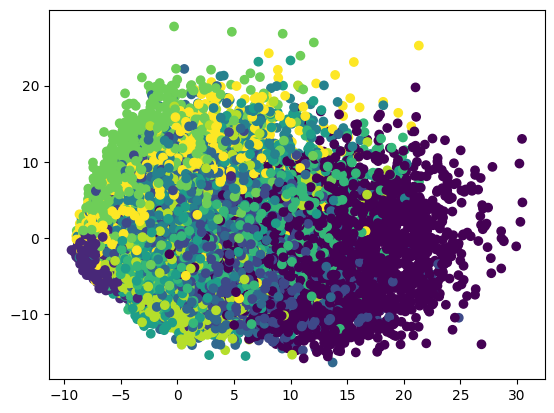

In [117]:
import matplotlib.pyplot as plt

plt.scatter(X_train_trf[:,0], X_train_trf[:,1], c=Y_train)
plt.show()

In [122]:
# 3D rendering 
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [123]:
X_train_trf

array([[-2.71863253, -0.48982409,  1.1354966 ],
       [-0.67698015, -6.75362491, -2.33590139],
       [-3.03323281,  6.50981624,  7.49182983],
       ...,
       [ 2.14883643,  0.78079444, -0.74738774],
       [ 1.05957006,  0.94767312,  3.94973114],
       [17.70258446,  1.96188185, -4.94352837]])

In [127]:
Y_train.shape

(33600,)

In [128]:
y_train_trf =Y_train.astype(str)
fig = px.scatter_3d(
                    x=X_train_trf[:,0],
                    y=X_train_trf[:,1],
                    z=X_train_trf[:,2],
                    color=y_train_trf)
fig.update_layout(
    margin =dict(l=20,r=20,t=20,b=20)
) 
fig.show()

In [ ]:
# Eigen values 
pca.explained_variance_

array([40.67111198, 29.17023401, 26.74459621])

In [132]:
# Eigen vectors ( 3 vectors in the 784 dimensional space )
pca.components_.shape

(3, 784)

In [133]:
# How many component we need to acheve 90 % varience 
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [135]:
X_train_trf.shape

(33600, 784)

In [ ]:
pca.explained_variance_.shape # 784 Eigen values 

(784,)

In [ ]:
pca.components_.shape # 784 components in the 784 D space 

(784, 784)

In [ ]:
np.cumsum(pca.explained_variance_ratio_) #Cumulative sum 

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

 I want that no of components or eigen vectors that explain 90% of varience of my data 

Text(0, 0.5, 'Varience explained')

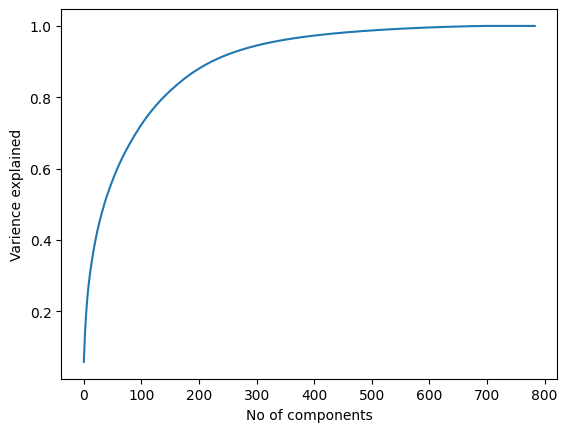

In [145]:
# Chosse from the n_component_value which shows 90% of varience 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of components')
plt.ylabel('Varience explained')

between 200 or 300 ,my 90 % of varience is explained , so let my n_components=250 for better results 